# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [50]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [51]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

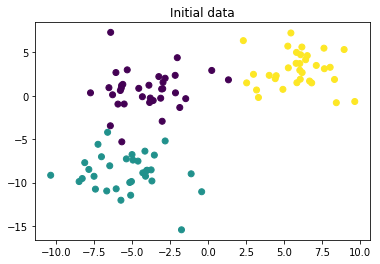

In [52]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [53]:
import numpy as np
from collections import Counter

In [54]:
def distance_func(test_point, x_train):
    distances = []
    for index, train_point in enumerate(x_train):
        distances.append((np.linalg.norm(test_point - train_point), index))
    return sorted(distances, key=lambda x: x[0])

In [55]:
def funct_kNN(x_train, y_train, x_test, k):
    predictions = [] 
    for test_point in x_test:
        neighbors_by_distance = distance_func(test_point, x_train)[:k]
        neighbors_labels = [y_train[point[1]] for point in neighbors_by_distance]
        counter = Counter(neighbors_labels)
        predictions.append(counter.most_common(1)[0][0])
    return np.array(predictions)

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
k_array = [1, 3, 5, 7, 9]
for k in k_array:
    predictions = funct_kNN(X_train, y_train, X_test, k)
    print('k = %d: accurace = %f' % (k, accuracy_score(y_test, predictions)))

k = 1: accurace = 0.939394
k = 3: accurace = 0.969697
k = 5: accurace = 0.969697
k = 7: accurace = 0.969697
k = 9: accurace = 0.969697


Постройте разделающие поверхности, которые строит классификатор

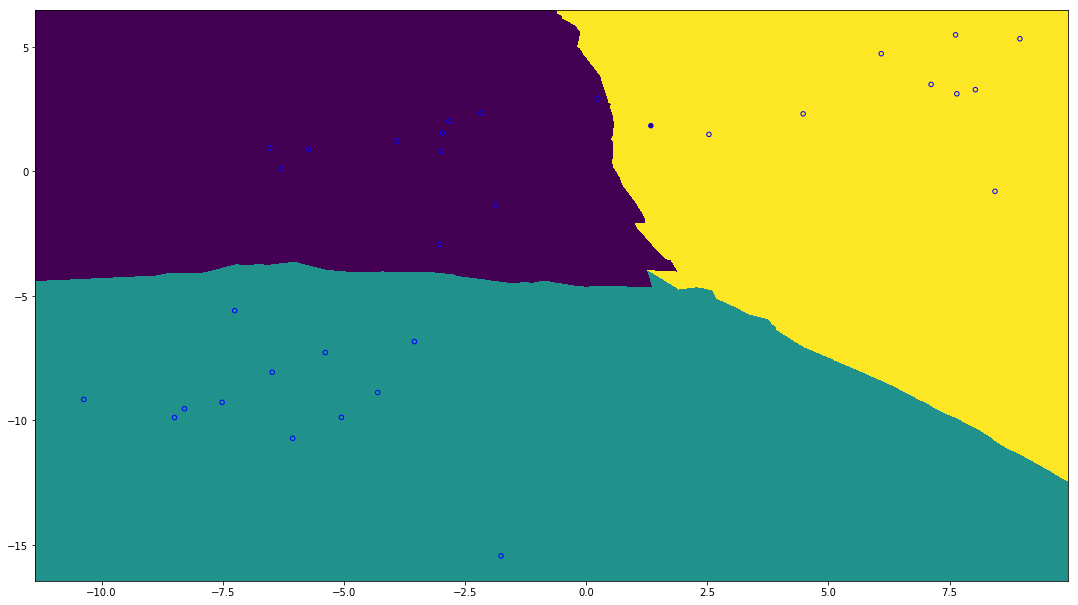

In [30]:
h = .02      
    
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))             

Z = funct_kNN(X_train,y_train,np.c_[xx.ravel(), yy.ravel()],9)
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,edgecolor='b', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.gcf().set_size_inches(18.5, 10.5)

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [57]:
def kNN_regression(x_train, y_train, x_test, k):
    predictions = [] 
    for test_point in x_test:
        neighbors_by_distance = distance_func(test_point, x_train)[:k]
        neighbors_labels = [y_train[point[1]] for point in neighbors_by_distance]
        predictions.append(np.mean(neighbors_labels))
    return np.array(predictions)

In [72]:
from math import sin

X = np.arange(0, 5, 0.2)
y = [sin(x) for x in X]

In [59]:
from sklearn.metrics import mean_absolute_error

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for k in k_array:
    predictions = kNN_regression(X_train, y_train, X_test, k)
    print('k = %d: error = %f' % (k, mean_absolute_error(y_test, predictions)))

k = 1: error = 0.137092
k = 3: error = 0.180845
k = 5: error = 0.260293
k = 7: error = 0.328851
k = 9: error = 0.436168


Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

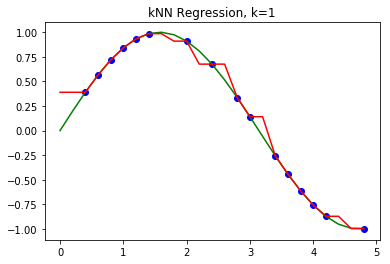

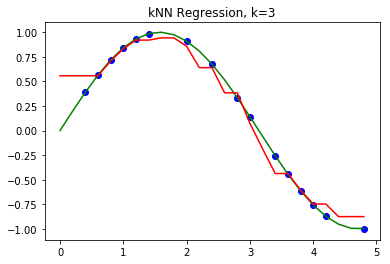

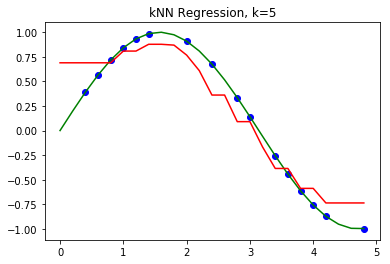

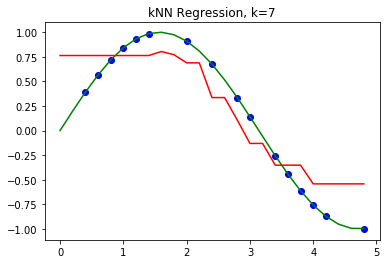

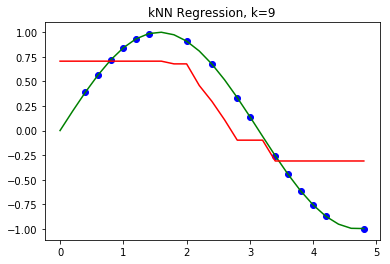

In [74]:
for k in k_array:
    predictions = kNN_regression(X_train, y_train, X, k)
    plt.scatter(X_train, y_train, c='blue')
    plt.plot(X, y, c='green')
    plt.plot(X, predictions, c='red')
    plt.title('kNN Regression, k={}'.format(k))
    plt.show()